In [43]:
import torch
import numpy
import torch.nn.functional as nnF
import matplotlib.pyplot as plt
from IPython import display

from torch import nn

%matplotlib inline

## 从零实现 Linear

利用自动求导机制, 实现线性回归

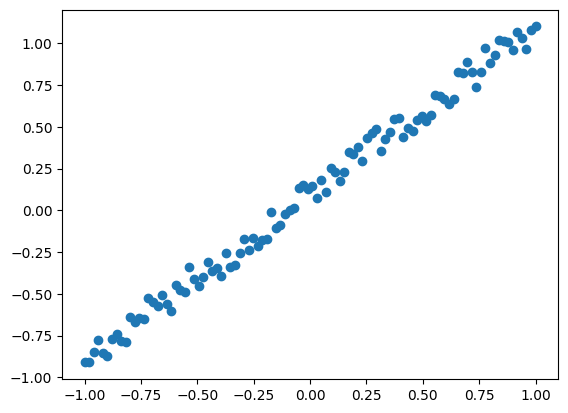

In [44]:
# 准备数据

trainX = torch.unsqueeze(torch.linspace(-1, 1, 100), dim = 1)
trainY = trainX + 0.2 * torch.rand(trainX.size())                # random noisy

plt.scatter(trainX.data.numpy(), trainY.data.numpy())

In [45]:
# 定义参数
W = torch.normal(0, 0.01, size = (1, 1), requires_grad = True)
b = torch.zeros(1, requires_grad = True)
lr = 0.03

In [46]:
# 定义前向传播 和 损失函数

def Forward(inputs):
    return inputs @ W + b                       # @ 表示矩阵乘法

def LossFunction(predictionY, Y):
    return (predictionY - Y).pow(2).mean()

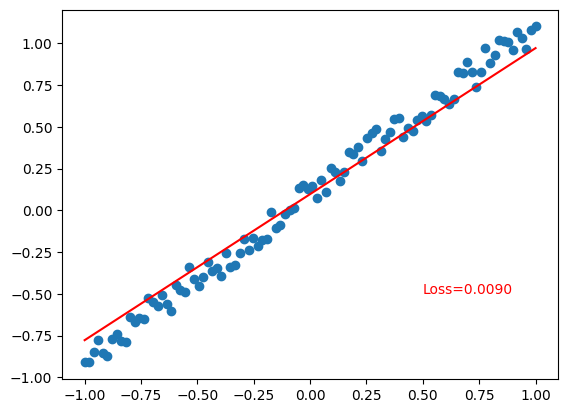

In [47]:
history = {
    'loss': []
}
for i in range(100):
    predictionY = Forward(trainX)
    loss = LossFunction(predictionY, trainY)

    loss.backward()

    with torch.no_grad():
        W -= W.grad * lr
        b -= b.grad * lr

        W.grad.zero_()
        b.grad.zero_()
    if (i + 1) % 5 == 0:
        plt.cla()
        plt.scatter(trainX.data.numpy(), trainY.data.numpy())
        plt.plot(trainX.data.numpy(), predictionY.data.numpy(), 'r-')
        plt.text(0.5, -0.5, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 10, 'color':  'red'})
        plt.pause(0.1)

        display.clear_output(wait = True)
        history['loss'].append(loss.item())